In [2]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastcore.all import *
from fastai.vision.all import *

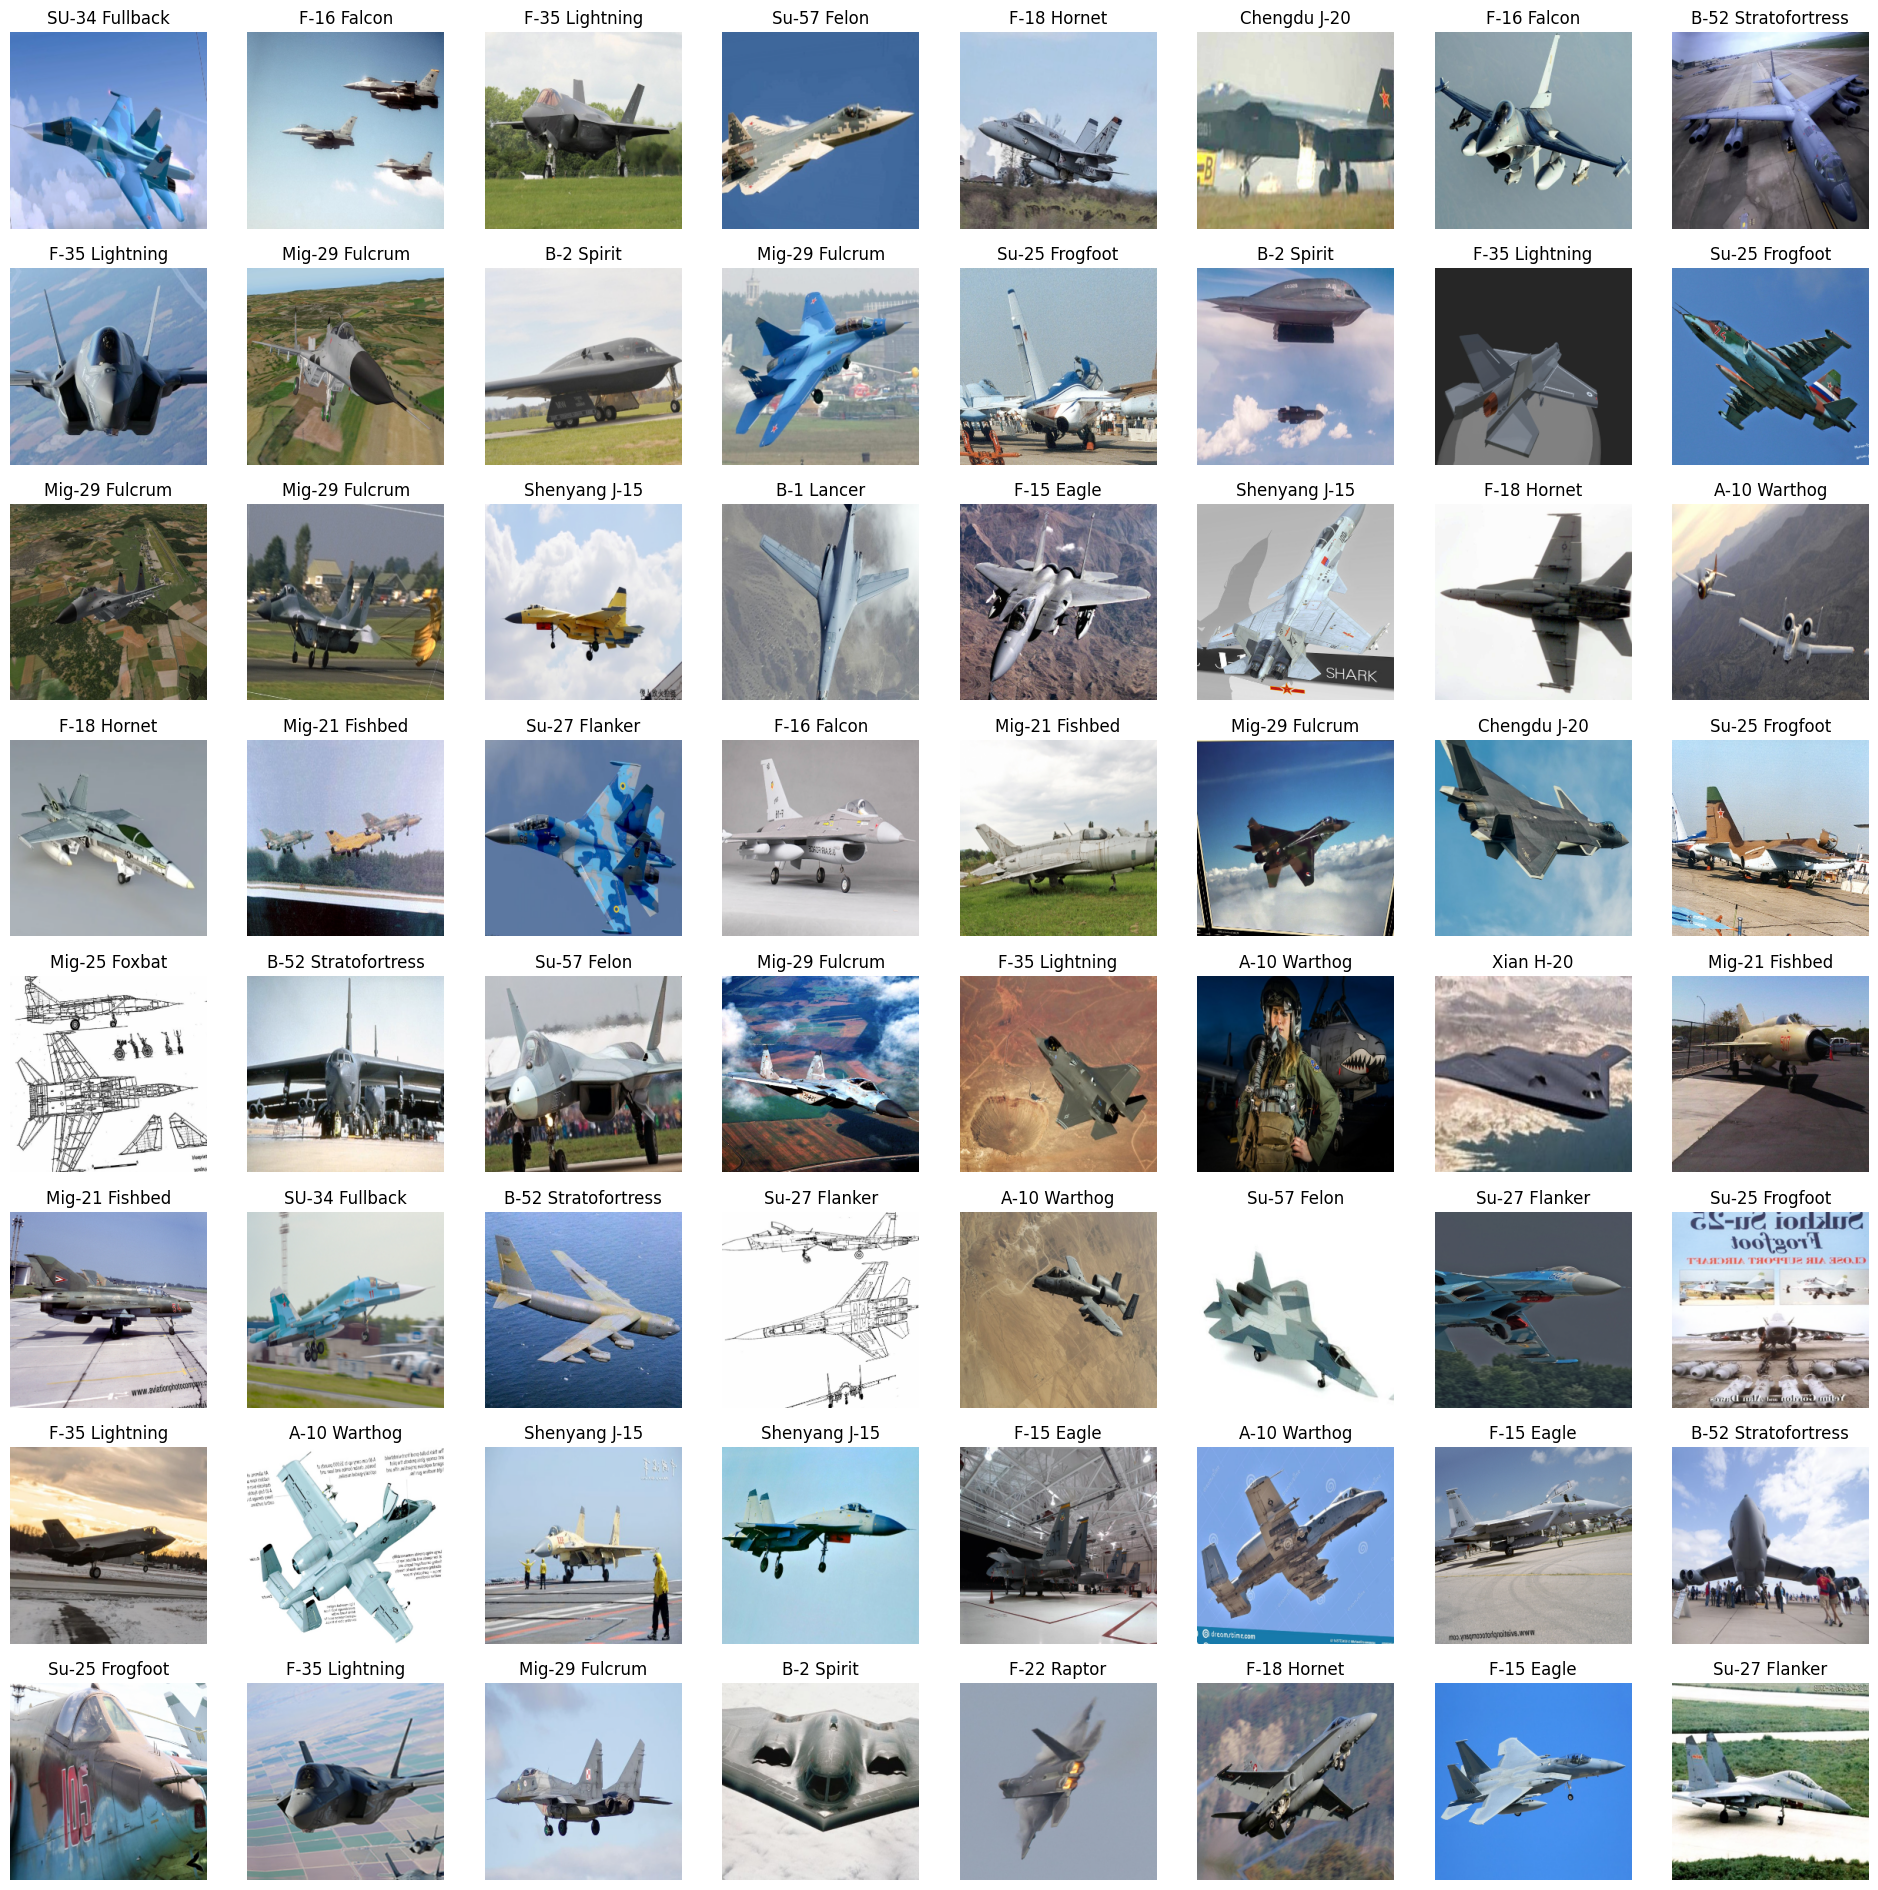

In [5]:
path = Path('train')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize((512,512), method='squish')],
    batch_tfms=aug_transforms(size=(256,256))
).dataloaders(path)

dls.show_batch(max_n=64)

Basic FastAI fine_tune method

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(32)
learn.save('aircraft-classification-short.resnet18')
learn

Working code for method using find_lr each step to minimize training loss

In [13]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

# Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR
base_lr = 2e-3
freeze_epochs = 1
pct_start = 0.3
    
learn.freeze()
learn.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99)
learn.save('aircraft-classification-short.resnet50.F')

/opt/homebrew/Caskroom/miniforge/base/envs/apple-m2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/apple-m2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Path('models/aircraft-classification-short.resnet50.F.pth')

1) https://forums.fast.ai/t/why-do-we-need-to-unfreeze-the-learner-everytime-before-retarining-even-if-learn-fit-one-cycle-works-fine-without-learn-unfreeze/41614/3

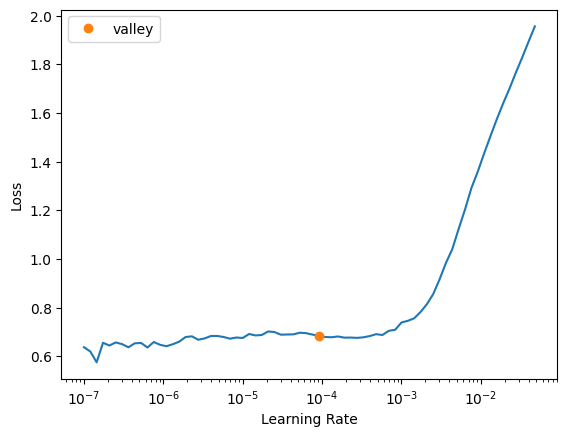

In [33]:
learn.unfreeze()
lr = learn.lr_find()

In [34]:
lr.valley

9.120108734350652e-05

In [36]:
epochs = 1
learn.fit_one_cycle(epochs, slice(lr.valley), pct_start)
learn.save('aircraft-classification-short.resnet50.4')

Path('models/aircraft-classification-short.resnet50.4.pth')

Notes:

1) https://towardsdatascience.com/an-introduction-to-computer-vision-using-transfer-learning-in-fast-ai-aircraft-classification-a2685d266ac
2) https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa
3) https://towardsdatascience.com/how-to-make-a-state-of-the-art-model-with-fastai-bd11e168b214
4) https://arxiv.org/pdf/1706.04983.pdf

KeyboardInterrupt: 

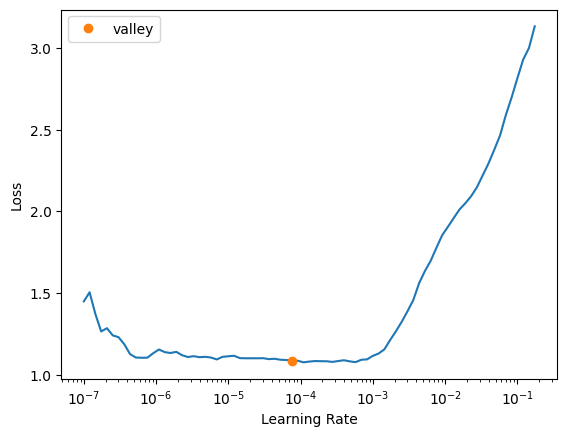

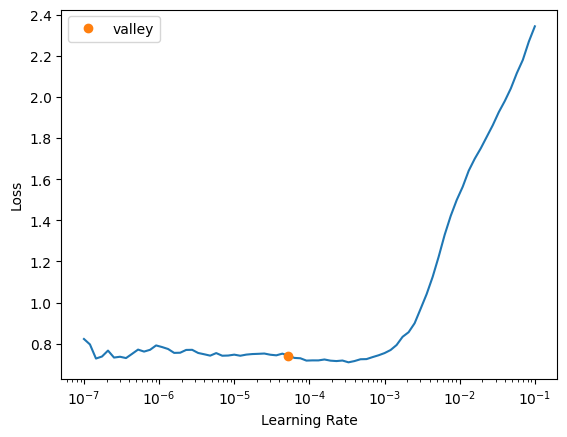

In [7]:
##### This is the beginning of the UBER train method #####
learn = vision_learner(dls, resnet50, metrics=error_rate)

base_lr = 2e-3
mult = 0.10
freeze_epochs = 2
pct_start = 0.3
  
learn.freeze()
learn.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99)

learn.save('aircraft-classification-short.resnet50.uber.F')

uber_epochs = 8
for i in range(0,uber_epochs):

    learn.unfreeze()
    lr = learn.lr_find()

    mini_epochs = 1
    learn.fit_one_cycle(mini_epochs, slice(lr.valley * mult, lr.valley), pct_start)
    learn.save('aircraft-classification-short.resnet50.uber.' + str(i))